In [802]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Code Part 1

Text(0, 0.5, 'y')

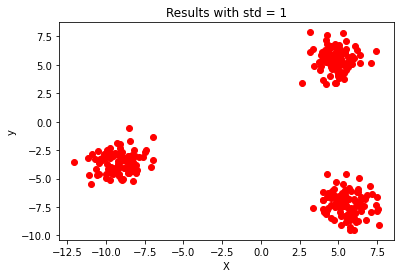

In [872]:
# Generate 300 samples with 2 features and std = 1
X, cluster_label = make_blobs(n_samples=300, centers=3, cluster_std = 1, n_features=2, random_state=234874892)
plt.scatter(X[:, 0], X[:, 1], color = 'r')
plt.title("Results with std = 1")
plt.xlabel("X")
plt.ylabel("y")

Text(0, 0.5, 'y')

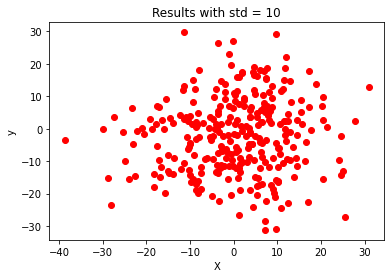

In [774]:
# Generate 300 samples with 2 features and std = 10
X1, cluster_label1 = make_blobs(n_samples=300, centers=3, cluster_std = 10, n_features=2, random_state=234874892)
plt.scatter(X1[:, 0], X1[:, 1], color = 'r')
plt.title("Results with std = 10")
plt.xlabel("X")
plt.ylabel("y")

#### Comments:
We can see from the plots above that if data is generated with a small standard deviation (eg. `cluster_std = 1`, the default one) we can clearly see distinct clusters of generated samples (in this case we have 3 centroids, so 3 clusters, `centers=3`). If the standard deviation is high (eg. `cluster_std = 10`), we cant see a clear separations between the clusters. We can also see that the number of outliers is high, which makes K-means clustering less effective because mean is easily influenced by extreme values.

### Code Part 2  (K-means)

In [2506]:
# K-Means implementation
class K_Means:
    def __init__(self,k):
        self.k = k
    def cluster(self, X, maxIter = 300, c = 1e-5):

        # Pick k (random) points as initial centers
        centers= np.random.rand(self.k, X.shape[1])
        centers_prev = np.zeros((self.k, len(X[0, :])))

        iterations = 0
        while iterations != maxIter:

            distances = np.zeros((len((X[:, 1])), self.k))

            clusters = np.empty((self.k, 0)).tolist()

            # Find Euclidean distances from every instance and every center
            for i in range(len(X[:, 1])):
                for j in range(self.k):
                    distances[i,j] = np.linalg.norm(X[i, :] - centers[j, :])

            # Add instances to the corresponding clusters, cluster is chosen based on the minimal Euclidean distance
            for i in range(len(distances[:, 1])):
                # closes cluster for ith element
                cl = np.argmin(distances[i, :])
                clusters[cl].append(X[i, :])

            # Update center values to the mean of each cluster
            for i in range(self.k):
                if len(clusters[i]) == 0:
                    centers[i, :] = np.random.rand(X.shape[1])
                else:
                    centers[i, :] = np.mean(clusters[i])

            # Check if current centers (means) are significantly different from previous ones, if no - break
            if np.linalg.norm(centers - centers_prev) < c:
                print("converged!")
                break
            centers_prev = centers
            iterations += 1
        return clusters

### Plotting Results

#### k=3

converged!


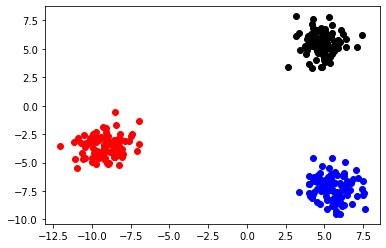

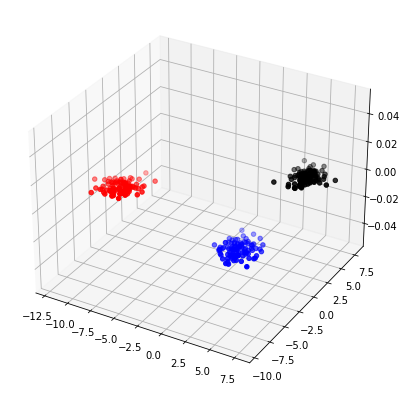

In [2632]:
# Apply K_Means method to cluster the data X generated before
KMeans =  K_Means(3)
clustering = KMeans.cluster(X)

# Plot the result for k = 3
cluster_1 = np.asarray(clustering[0])
cluster_2 = np.asarray(clustering[1])
cluster_3 = np.asarray(clustering[2])

plt.scatter(cluster_1[:, 0], cluster_1[:, 1], color = 'red')
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], color = 'black')
plt.scatter(cluster_3[:, 0], cluster_3[:, 1], color = 'blue')
plt.show()

# Plot the result of clustering in 3d for k = 3
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_1[:, 0], cluster_1[:, 1], color = 'red')
ax.scatter(cluster_2[:, 0], cluster_2[:, 1], color = 'black')
ax.scatter(cluster_3[:, 0], cluster_3[:, 1], color = 'blue')

#### k=4

converged!


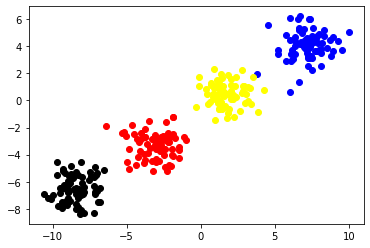

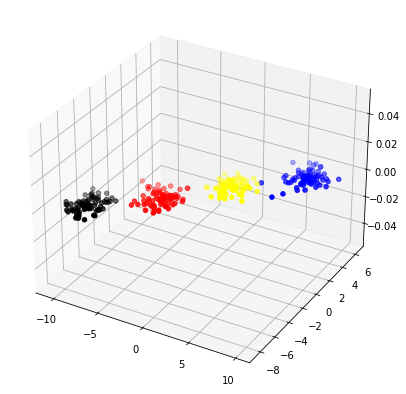

In [1064]:
# Generate 300 samples with 2 features, std = 1 and 4 centers
X_c4, cluster_label_c4 = make_blobs(n_samples=300, centers=4, cluster_std = 1, n_features=2, random_state=7812321)

# Apply K_Means method to cluster the data X_c4 generated above
KMeans =  K_Means(4)
clustering = KMeans.cluster(X_c4)

# Plot the result for k = 4
cluster_1 = np.asarray(clustering[0])
cluster_2 = np.asarray(clustering[1])
cluster_3 = np.asarray(clustering[2])
cluster_4 = np.asarray(clustering[3])

plt.scatter(cluster_1[:, 0], cluster_1[:, 1], color = 'red')
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], color = 'black')
plt.scatter(cluster_3[:, 0], cluster_3[:, 1], color = 'blue')
plt.scatter(cluster_4[:, 0], cluster_4[:, 1], color = 'yellow')
plt.show()

# Plot the result of clustering in 3d for k = 4
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_1[:, 0], cluster_1[:, 1], color = 'red')
ax.scatter(cluster_2[:, 0], cluster_2[:, 1], color = 'black')
ax.scatter(cluster_3[:, 0], cluster_3[:, 1], color = 'blue')
ax.scatter(cluster_4[:, 0], cluster_4[:, 1], color = 'yellow')

#### k=5

converged!


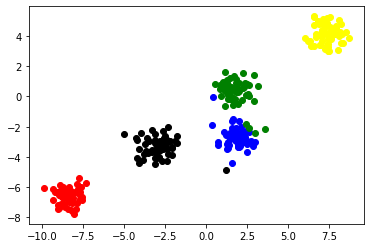

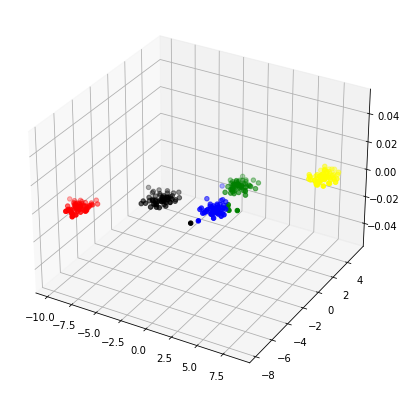

In [1623]:
# Generate 300 samples with 2 features, std = 0.6 and 5 centers
X_c5, cluster_label_c5 = make_blobs(n_samples=300, centers=5, cluster_std = 0.6, n_features=2, random_state = 7812321)

# Apply K_Means method to cluster the data X_c5 generated above
KMeans =  K_Means(5)
clustering = KMeans.cluster(X_c5)

# Plot the result for k = 5
cluster_1 = np.asarray(clustering[0])
cluster_2 = np.asarray(clustering[1])
cluster_3 = np.asarray(clustering[2])
cluster_4 = np.asarray(clustering[3])
cluster_5 = np.asarray(clustering[4])

plt.scatter(cluster_1[:, 0], cluster_1[:, 1], color = 'red')
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], color = 'black')
plt.scatter(cluster_3[:, 0], cluster_3[:, 1], color = 'blue')
plt.scatter(cluster_4[:, 0], cluster_4[:, 1], color = 'yellow')
plt.scatter(cluster_5[:, 0], cluster_5[:, 1], color = 'green')
plt.show()

# Plot the result of clustering in 3d for k = 5
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_1[:, 0], cluster_1[:, 1], color = 'red')
ax.scatter(cluster_2[:, 0], cluster_2[:, 1], color = 'black')
ax.scatter(cluster_3[:, 0], cluster_3[:, 1], color = 'blue')
ax.scatter(cluster_4[:, 0], cluster_4[:, 1], color = 'yellow')
ax.scatter(cluster_5[:, 0], cluster_5[:, 1], color = 'green')

#### k=6

converged!


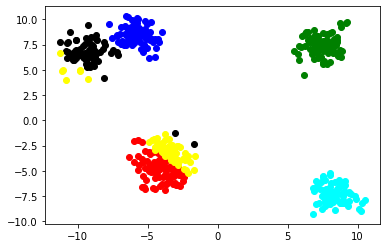

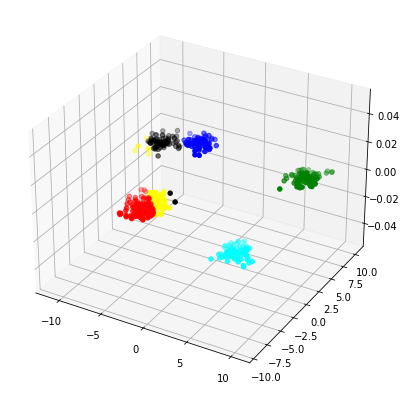

In [2629]:
# Generate 300 samples with 2 features, std = 0.6 and 6 centers
X_c6, cluster_label_c6 = make_blobs(n_samples=500, centers=6, cluster_std = 0.9, n_features=2, random_state = 78131917)

# Apply K_Means method to cluster the data X_c6 generated above
KMeans =  K_Means(6)
clustering = KMeans.cluster(X_c6)

# Plot the result for k = 6
cluster_1 = np.asarray(clustering[0])
cluster_2 = np.asarray(clustering[1])
cluster_3 = np.asarray(clustering[2])
cluster_4 = np.asarray(clustering[3])
cluster_5 = np.asarray(clustering[4])
cluster_6 = np.asarray(clustering[5])

plt.scatter(cluster_1[:, 0], cluster_1[:, 1], color = 'red')
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], color = 'black')
plt.scatter(cluster_3[:, 0], cluster_3[:, 1], color = 'blue')
plt.scatter(cluster_4[:, 0], cluster_4[:, 1], color = 'yellow')
plt.scatter(cluster_5[:, 0], cluster_5[:, 1], color = 'green')
plt.scatter(cluster_6[:, 0], cluster_6[:, 1], color = 'cyan')
plt.show()

# Plot the result of clustering in 3d for k = 5
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_1[:, 0], cluster_1[:, 1], color = 'red')
ax.scatter(cluster_2[:, 0], cluster_2[:, 1], color = 'black')
ax.scatter(cluster_3[:, 0], cluster_3[:, 1], color = 'blue')
ax.scatter(cluster_4[:, 0], cluster_4[:, 1], color = 'yellow')
ax.scatter(cluster_5[:, 0], cluster_5[:, 1], color = 'green')
ax.scatter(cluster_6[:, 0], cluster_6[:, 1], color = 'cyan')